In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
wego = pd.read_csv("../data/headway_data.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [103]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [104]:
# drop trips where previous stop was cancelled

wego = wego.drop(wego[wego.PREV_SCHED_STOP_CANCELLED == 1.0].index)

In [105]:
wego = wego.drop(wego[(wego['ADJUSTED_EARLY_COUNT'] == 0.0) & (wego['ADJUSTED_LATE_COUNT'] == 0.0) & (wego['ADJUSTED_ONTIME_COUNT'] == 0.0)].index)

In [106]:
percentile1adh=wego['ADHERENCE'].quantile(0.001)
print(percentile1adh)

percentile99adh=wego['ADHERENCE'].quantile(0.999)
print(percentile99adh)

print('')

percentile1hdwy=wego['HDWY_DEV'].quantile(0.001)
print(percentile1hdwy)

percentile99hdwy=wego['HDWY_DEV'].quantile(0.999)
print(percentile99hdwy)

-57.040499999999994
9.466666

-21.624767162
56.43715000000084


In [107]:
wego = wego.drop(wego[wego.ADHERENCE < percentile1adh].index)
wego = wego.drop(wego[wego.ADHERENCE > percentile99adh].index)
wego = wego.drop(wego[wego.HDWY_DEV < percentile1hdwy].index)
wego = wego.drop(wego[wego.HDWY_DEV > percentile99hdwy].index)

In [108]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334031 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                334031 non-null  int64  
 1   SERVICE_ABBR               334031 non-null  int64  
 2   ADHERENCE_ID               334031 non-null  int64  
 3   DATE                       334031 non-null  object 
 4   ROUTE_ABBR                 334031 non-null  int64  
 5   BLOCK_ABBR                 334031 non-null  int64  
 6   OPERATOR                   334031 non-null  int64  
 7   TRIP_ID                    334031 non-null  int64  
 8   OVERLOAD_ID                334031 non-null  int64  
 9   ROUTE_DIRECTION_NAME       334031 non-null  object 
 10  TIME_POINT_ABBR            334031 non-null  object 
 11  ROUTE_STOP_SEQUENCE        334026 non-null  float64
 12  TRIP_EDGE                  334031 non-null  int64  
 13  LATITUDE                   334031 

# Q1

In [109]:
adjusted_counts = wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,266891
1,0,1,0,57690
2,1,0,0,9450


In [111]:
# # Jessica's alternate
# # Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

In [121]:
# What percentage of trips were on time? We removed trips that had zeros in all adjusted columns.

print(str(round(((adjusted_counts['count'].iloc[0])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were on time.')
print(str(round(((adjusted_counts['count'].iloc[1])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were early.')
print(str(round(((adjusted_counts['count'].iloc[2])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were late.')

79.9% of trips were on time.
17.27% of trips were early.
2.83% of trips were late.


In [113]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-56.800000
max,9.466666
mean,-3.085273


In [114]:
wego.agg({'HDWY_DEV': ['min','max','mean']})

,HDWY_DEV
min,-21.600000
max,56.400000
mean,0.399233


In [115]:
#investigating some of the outliers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wego.nsmallest(10,'HDWY_DEV')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
213059,120230907,1,100532979,2023-09-07,23,2312,2352,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-08 00:35:00,2023-09-10 00:32:31,2023-09-09 00:35:33,-0.550000,30.0,8.400000,-21.600000,0,0,1,0,0.0,0,3.033333,NaN
34818,120230807,1,99620627,2023-08-07,23,2312,2751,350499,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-07 21:55:00,2023-08-07 21:58:18,2023-08-07 21:58:18,-3.300000,40.0,18.416666,-21.583334,0,0,1,0,0.0,0,0.000000,NaN
75152,120230814,1,99823898,2023-08-14,23,2312,2751,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-15 00:35:00,2023-08-17 00:35:29,2023-08-16 00:35:29,-0.483333,30.0,8.416666,-21.583334,0,0,1,0,0.0,0,0.000000,NaN
262382,120230915,1,99981868,2023-09-15,52,5213,3064,352262,0,FROM DOWNTOWN,DCSCC,11.0,0,36.086817,-86.686874,2023-09-15 15:54:00,2023-09-15 16:00:05,2023-09-15 16:02:48,-8.800000,32.0,10.416666,-21.583334,0,1,0,0,0.0,0,2.716666,NaN
47780,120230809,1,99683041,2023-08-09,23,2312,2352,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-10 00:35:00,2023-08-12 00:34:03,2023-08-11 00:34:03,0.950000,30.0,8.466666,-21.533334,0,0,1,0,0.0,0,0.000000,NaN
267741,120230916,2,100004403,2023-09-16,52,5211,2706,352197,0,TO DOWNTOWN,LINWAL,6.0,0,36.083418,-86.704722,2023-09-16 19:59:00,2023-09-16 19:59:20,2023-09-16 19:59:20,-0.333333,51.0,29.533333,-21.466667,0,0,1,0,0.0,0,0.000000,NaN
191375,120230902,2,100392781,2023-09-02,7,701,2164,353384,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-02 18:15:00,2023-09-02 18:21:40,2023-09-02 18:21:40,-6.666666,30.0,8.566666,-21.433334,0,1,0,0,0.0,0,0.000000,NaN
16308,120230803,1,99530202,2023-08-03,52,5211,624,347343,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-08-03 10:36:00,2023-08-03 10:39:04,2023-08-03 10:39:04,-3.066666,30.0,8.583333,-21.416667,0,0,1,0,0.0,0,0.000000,NaN
246919,120230913,1,100693917,2023-09-13,23,2312,2352,350499,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-13 21:55:00,2023-09-13 21:54:45,2023-09-13 21:57:26,-2.433333,40.0,18.600000,-21.400000,0,0,1,0,0.0,0,2.683333,NaN
70937,120230813,3,99799918,2023-08-13,23,2313,1904,350592,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-13 08:29:00,2023-08-13 08:27:01,2023-08-13 08:30:10,-1.166666,25.0,3.650000,-21.350000,0,0,1,0,0.0,0,3.150000,6.0


C:\Users\tayjy\AppData\Local\Temp\ipykernel_20012\928343750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wego['HDWY_DEV'])
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\AppData\Local\Temp\ipykernel_20012\928343750.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibili

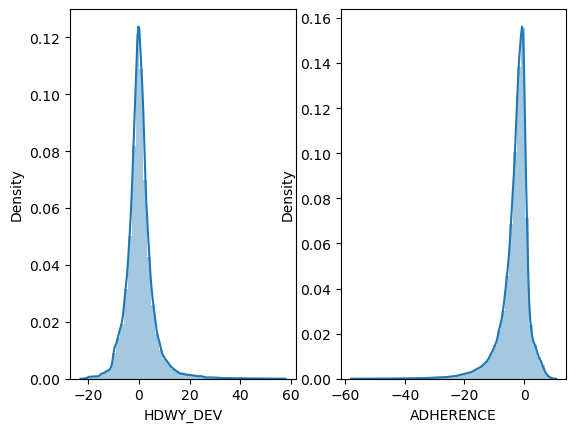

In [116]:
plt.subplot(1,2,1)
sns.distplot(wego['HDWY_DEV'])

plt.subplot(1,2,2)
sns.distplot(wego['ADHERENCE'])

plt.show()

<Axes: ylabel='HDWY_DEV'>

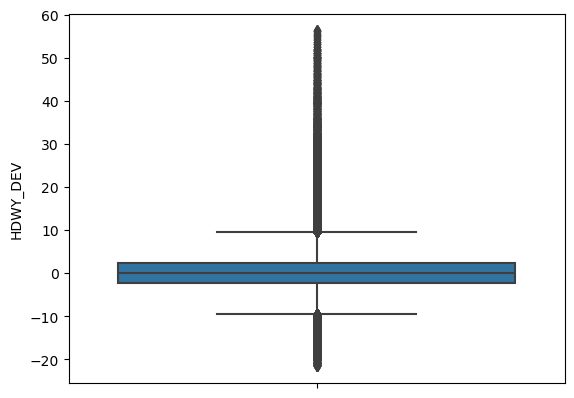

In [117]:
sns.boxplot( y=wego['HDWY_DEV'])

<Axes: ylabel='ADHERENCE'>

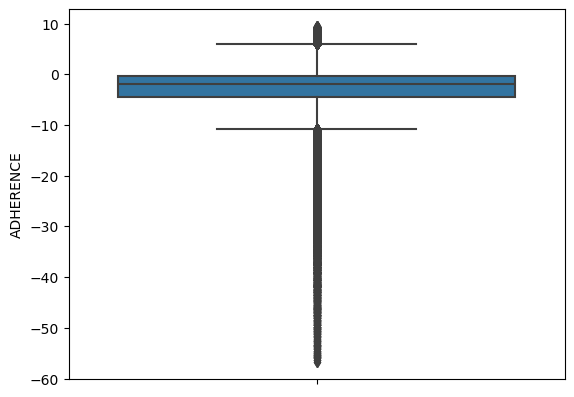

In [118]:
sns.boxplot( y=wego['ADHERENCE'])

In [119]:
# create headway deviation % column and bunching/gapping, acceptable range for each trip, is within range 1/0

In [132]:
wego['HEADWAY_DEVIATION_PERCENTAGE'] = round((wego['HDWY_DEV']/wego['SCHEDULED_HDWY'])*100,2)

wego.head(100)


wego['BUNCHING_OR_GAPPING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       > 0, 'Bunching','Gapping')

In [133]:
wego.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HEADWAY_DEVIATION_PERCENTAGE,BUNCHING_OR_GAPPING
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,Gapping
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,Gapping
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,Gapping
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,Gapping
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,Gapping
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,Gapping
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,Gapping
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.62,Bunching
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.62,Bunching
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.22,Gapping


# Q2

In [13]:
wego['ROUTE_DIRECTION_NAME'].value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [14]:
wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'HDWY_DEV': ['min','max','mean']})

HDWY_DEV                      
                            min         max      mean
ROUTE_DIRECTION_NAME                                 
FROM DOWNTOWN        -55.533334  565.433333  0.579990
TO DOWNTOWN          -64.000000  543.833333  0.447773

In [15]:
wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'ADHERENCE': ['min','max','mean']})

ADHERENCE                     
                             min        max      mean
ROUTE_DIRECTION_NAME                                 
FROM DOWNTOWN        -948.533333  76.766666 -3.960287
TO DOWNTOWN          -618.166666  88.383333 -2.321804